In [123]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data found here
'https://www.kaggle.com/chicago/chicago-energy-benchmarking'


#import data 

df1 = pd.read_csv('chicago-energy-benchmarking.csv')
df2 = pd.read_csv('chicago-energy-benchmarking-covered-buildings.csv')

#combine two dfs into one for ease, merged on building id numbers, used left df as main
df = pd.merge(df1, df2, how='left', left_on='ID', right_on='Building ID')



#print out column headers & size of df
print(df.info())

#set up varibales for easy changes
x1 = 'Primary Property Type'
x2 = 'Weather Normalized Source EUI (kBtu/sq ft)'
x3 = 'GHG Intensity (kg CO2e/sq ft)' 
x4 = 'Data Year'

#removes rows where columns x2 and x3 doesn't have any values
df = df.dropna(subset = [x2, x3])

#prints df to a csv file 
df.to_csv('df test.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4481 entries, 0 to 4480
Data columns (total 37 columns):
Data Year                                     4481 non-null int64
ID                                            4481 non-null int64
Property Name                                 4481 non-null object
Address_x                                     4481 non-null object
ZIP Code                                      4481 non-null object
Community Area                                4481 non-null object
Primary Property Type                         4481 non-null object
Gross Floor Area - Buildings (sq ft)          4481 non-null float64
Year Built                                    4476 non-null float64
# of Buildings                                4481 non-null int64
ENERGY STAR Score                             3700 non-null float64
Electricity Use (kBtu)                        4455 non-null float64
Natural Gas Use (kBtu)                        3987 non-null float64
District Steam Use (

In [124]:


#group up data by property type by average and sums
elec_use = df[[x1, x2, x3]]\
.groupby([x1]).agg(['mean', sum]).reset_index()
print(elec_use.head())

#sends df to a csv file
elec_use.to_csv('electricity & ghg use.csv')

        Primary Property Type Weather Normalized Source EUI (kBtu/sq ft)  \
                                                                    mean   
0             Adult Education                                 173.185714   
1  Ambulatory Surgical Center                                 467.333333   
2       Automobile Dealership                                 192.955556   
3                 Bank Branch                                 246.100000   
4          College/University                                 232.108889   

           GHG Intensity (kg CO2e/sq ft)           
       sum                          mean      sum  
0   1212.3                     10.007143    70.05  
1   1402.0                     28.083333    84.25  
2   1736.6                     11.382222   102.44  
3   1230.5                     14.120000    70.60  
4  41779.6                     13.416611  2414.99  


In [125]:
#sort values by electricy/ghg use
elec_use = elec_use.sort_values([(x2, 'mean')], ascending=False)
ghg_use = elec_use.sort_values([(x3, 'mean')], ascending=False)

#seperate top five
top5e = elec_use[:5]
top5g = ghg_use[:5]
print(top5e)

         Primary Property Type Weather Normalized Source EUI (kBtu/sq ft)  \
                                                                     mean   
34             Performing Arts                                 900.592308   
44                  Strip Mall                                 692.076190   
15                  Laboratory                                 673.582692   
45   Supermarket/Grocery Store                                 605.996386   
1   Ambulatory Surgical Center                                 467.333333   

            GHG Intensity (kg CO2e/sq ft)           
        sum                          mean      sum  
34  11707.7                     47.723077   620.40  
44  29067.2                     37.167619  1561.04  
15  35026.3                     39.589231  2058.64  
45  50297.7                     35.595181  2954.40  
1    1402.0                     28.083333    84.25  


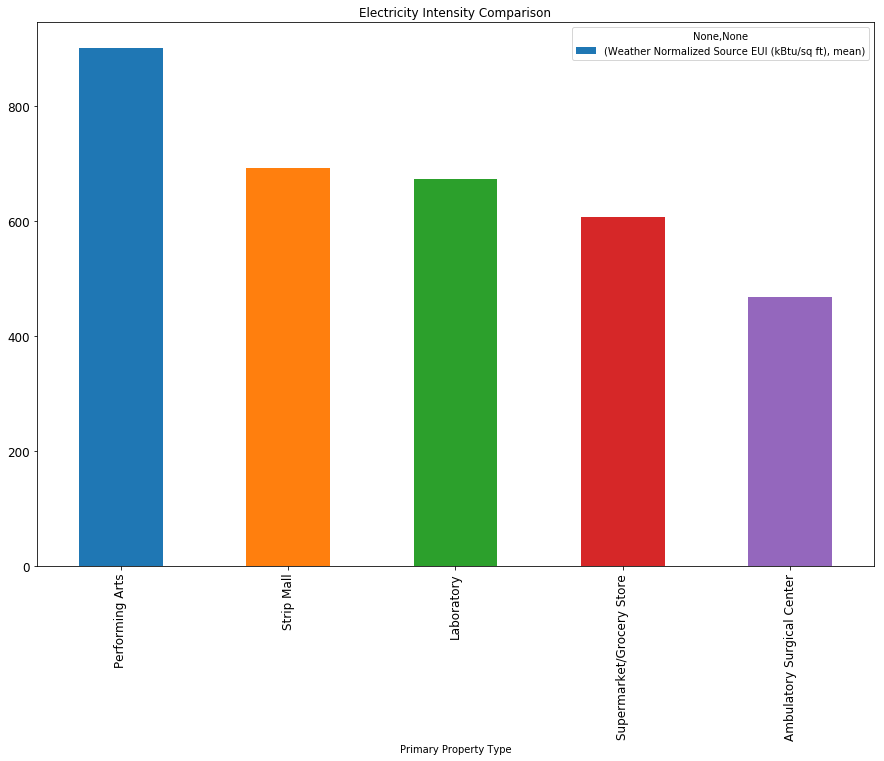

In [126]:
#magic line
%matplotlib inline

#plot top 5 property types by Energy Use Intensity (EUI)
ax = top5e.plot(kind='bar', x = x1, y = (x2,'mean'), title ="Electricity Intensity Comparison", \
                figsize=(15, 10), legend=True, fontsize=12)
plt.show()

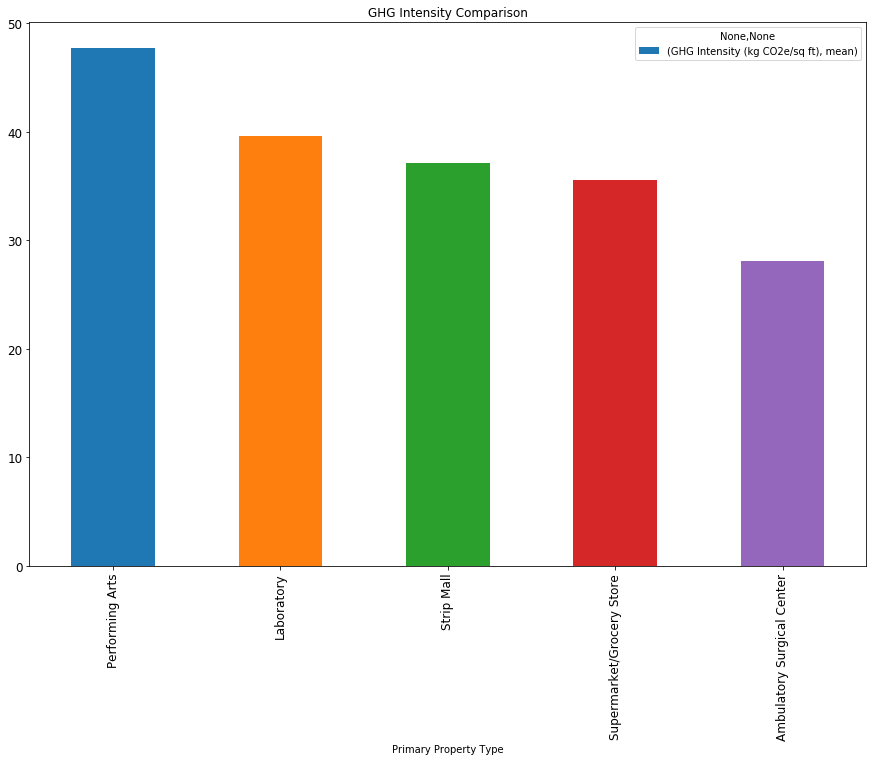

In [127]:
#print top 5 property types by GHG Intensity
ax = top5g.plot(kind='bar', x = x1, y = (x3,'mean'), title ="GHG Intensity Comparison", \
                figsize=(15, 10), legend=True, fontsize=12)
plt.show()

y = 0.05540165926801749 x + 0.6116253109559145


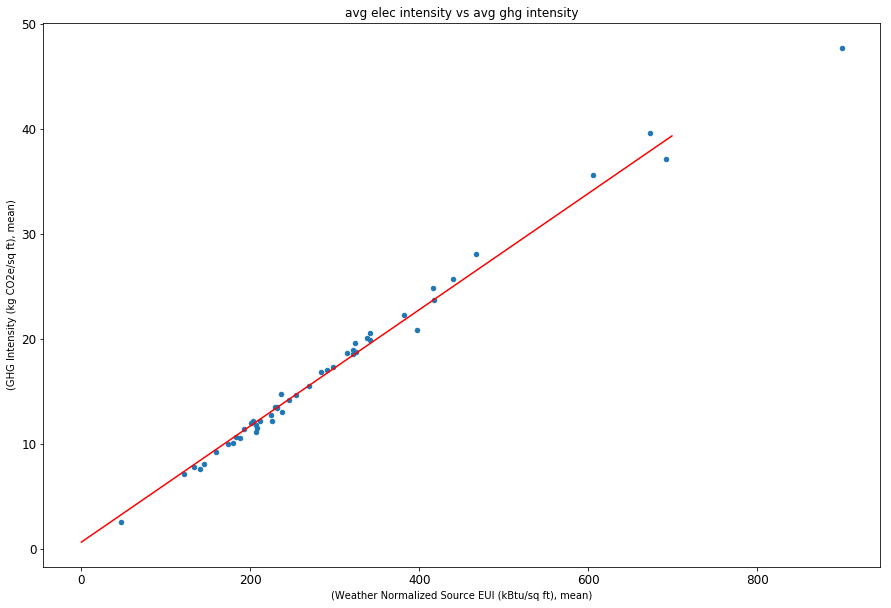

In [128]:
#creates a scatter plot of eui vs ghg intensity to see if there's a relationship
ax = elec_use.plot(kind='scatter', x = (x2,'mean'), y = (x3,'mean'), title ="avg elec intensity vs avg ghg intensity", \
                   figsize=(15, 10), legend=True, fontsize=12)

#find line of best fit formula
m, b = np.polyfit(elec_use[(x2,'mean')], elec_use[(x3,'mean')], 1)
print('y =',m,'x +',b)

#plots line of best fit
x = np.arange(0,700,1)
y = []
for i in x:
    y.append(m*i+b)
_ = plt.plot(x, y, color = 'red')
plt.show()

  Data Year Weather Normalized Source EUI (kBtu/sq ft)  \
                                                  mean   
0      2014                                 240.111454   
1      2015                                 228.628447   
2      2016                                 184.878101   

  GHG Intensity (kg CO2e/sq ft)  
                           mean  
0                     15.079295  
1                     13.413922  
2                     10.119932  


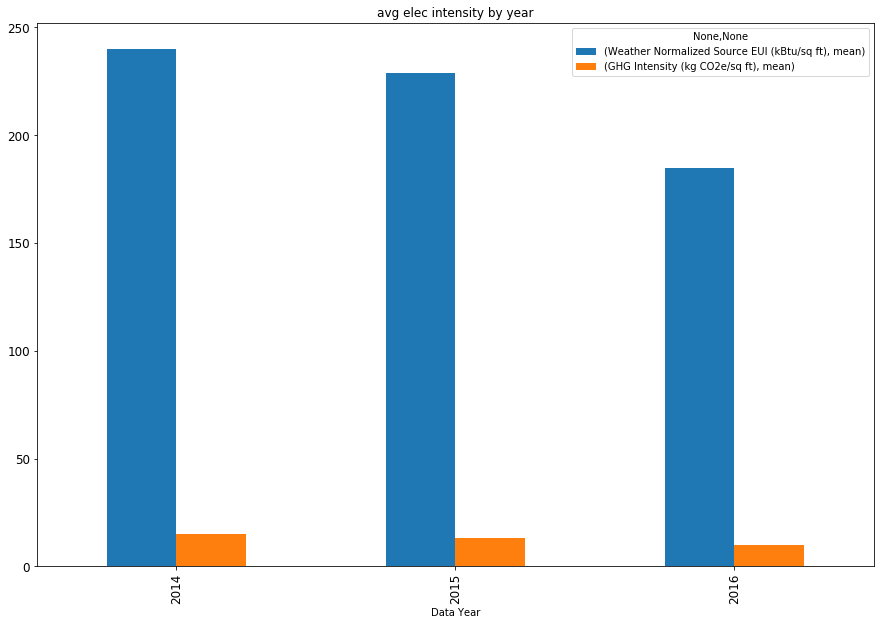

In [129]:
#compare eui and ghg intensity by different years

#sorts the df by year and average
year_use = df[[x1, x2, x3, x4]]\
.groupby([x4]).agg(['mean']).reset_index()
print(year_use)

#plots the different years using a bar plot
ax = year_use.plot(kind='bar', x = x4, y = [x2,x3], title ="avg elec intensity by year", \
                   figsize=(15, 10), legend=True, fontsize=12)




0    122.0
1    261.0
2    200.0
3    135.0
4    136.0
Name: Weather Normalized Source EUI (kBtu/sq ft), dtype: float64
min = 8.2
max = 499.9
mean = 174.9443967572726
std = 79.15637214081116
% of data = 0.9608247422680413


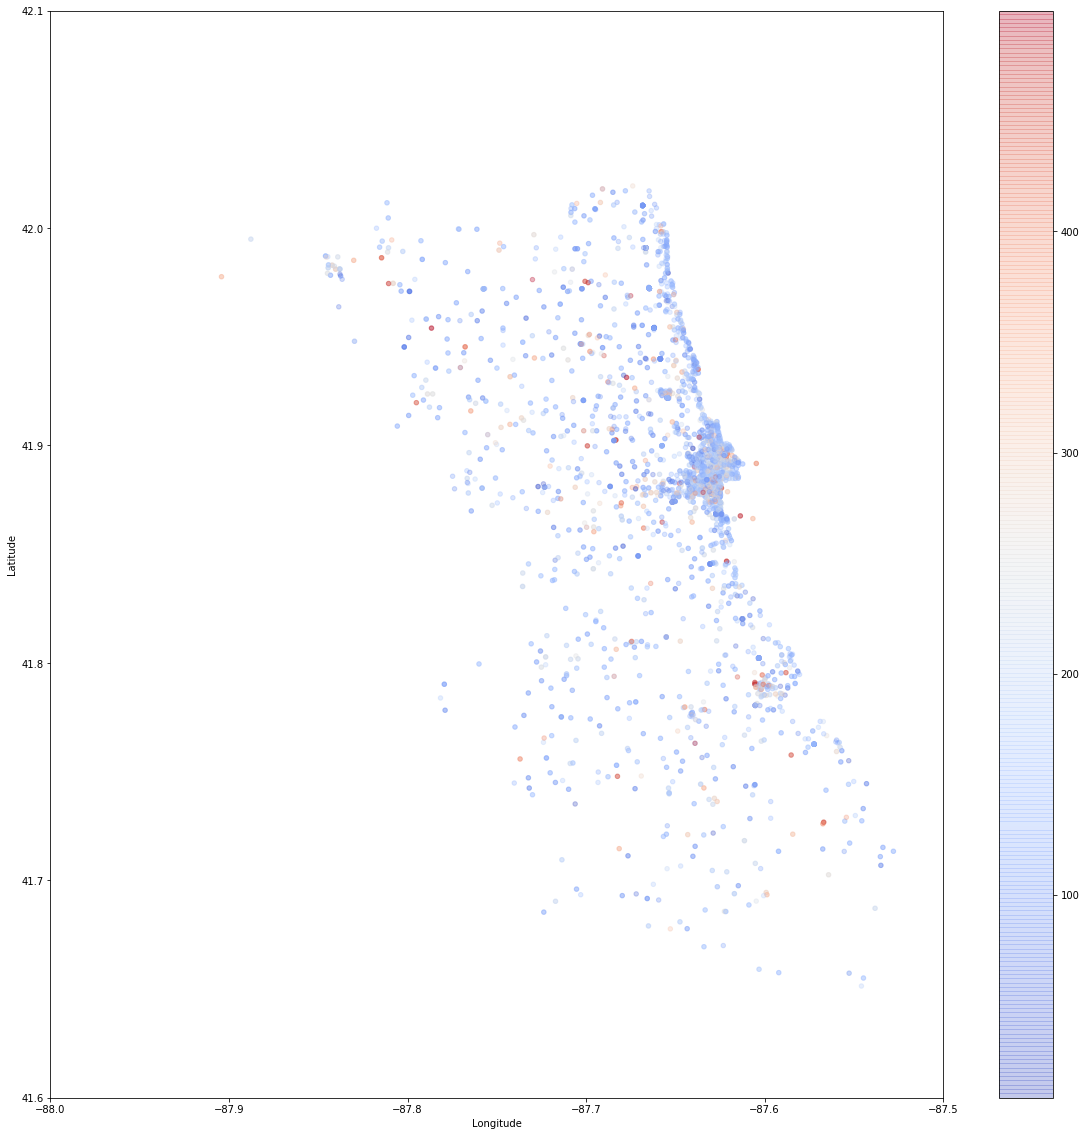

In [156]:
#sets up a dataframe with just coordinates and elec and ghg values
df_geo = df[['Longitude_y', 'Latitude_y', x2, x3]]
before = len(df_geo.index)

#filters out rows with values of x2>1000 to try to get better color gradient(didn't really help)
df_geo = df_geo[df_geo[x2].between(0, 500, inclusive = True)]
print(df_geo[x2].head())
after = len(df_geo.index)

#sets up a color scale based on eui

colors = plt.cm.coolwarm(df_geo[x2])
jet=plt.get_cmap('coolwarm')

#prints out stat data for observation
print('min =',df_geo[x2].min())
print('max =',df_geo[x2].max())
print('mean =',df_geo[x2].mean())
print('std =',df_geo[x2].std())
print('% of data =', after/before)

#plot size
plt.figure(figsize=(20,20))

#prints color scale scatter plot
plt.scatter(df_geo['Longitude_y'], df_geo['Latitude_y'], s=20,alpha =0.3, c=df_geo[x2], cmap=jet,  \
            vmin=df_geo[x2].min(), vmax=df_geo[x2].max() )
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#sets up axis to exclude unnecessary spaces
plt.axis([-88, -87.5, 41.6, 42.1])
plt.colorbar()